In [36]:
from statistics import mean

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso, LinearRegression, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score,  train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import LinearSVR

In [37]:
df = pd.read_csv('data/housing.csv')

Drop columns with multicollinearity.

In [38]:
df['ocean_proximity'] = LabelEncoder().fit_transform(df['ocean_proximity'])
df = df.drop(columns=['latitude', 'total_rooms', 'total_bedrooms', 'households', 'housing_median_age'])
df = df[(np.abs(zscore(df)) <= 3).all(axis=1)]

In [39]:
target = np.reshape(df.pop('median_house_value').to_numpy(), (-1, 1))
features = df

In [40]:
scaler_feature = MinMaxScaler().fit(features)
features = scaler_feature.transform(features)

In [41]:
scaler_target = MinMaxScaler().fit(target)
target = scaler_target.transform(target)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1234)

In [ ]:
print(mean(cross_val_score(LinearRegression(), x_train, y_train, cv=5, verbose=1, scoring='neg_mean_squared_error')))

In [ ]:
print(mean(cross_val_score(Ridge(), x_train, y_train, cv=5, verbose=1, scoring='neg_mean_squared_error')))

In [ ]:
print(mean(cross_val_score(SGDRegressor(), x_train, np.reshape(y_train, (y_train.shape[0],)), cv=5, verbose=1, scoring='neg_mean_squared_error')))

In [ ]:
print(mean(cross_val_score(Lasso(random_state=1234, tol=0.001, selection='cyclic', alpha=0.3), x_train, y_train, cv=5, verbose=1, scoring='neg_mean_squared_error')))

In [ ]:
print(mean(cross_val_score(GaussianProcessRegressor(), x_train, y_train, cv=5, verbose=1, scoring='neg_mean_squared_error')))

In [ ]:
print(mean(cross_val_score(KernelRidge(), x_train, y_train, cv=5, verbose=1, scoring='neg_mean_squared_error')))

In [ ]:
print(mean(cross_val_score(LinearSVR(max_iter=100000), x_train, np.reshape(y_train, (y_train.shape[0],)), cv=5, verbose=1, scoring='neg_mean_squared_error')))

In [ ]:
print(mean(cross_val_score(RandomForestRegressor(), x_train, np.reshape(y_train, (y_train.shape[0],)), cv=5, verbose=1, scoring='neg_mean_squared_error')))

The best is RandomForestRegressor. I will find hyperparameters for it.

In [ ]:
params = {
    'n_estimators': [2, 100, 200, 300],
    'criterion': ['squared_error'],
    'max_depth': [None, 5, 100, 200],
    'min_samples_split': [2, 20, 40],
    'min_samples_leaf': [2, 20, 40],
    'max_leaf_nodes': [None, 5, 250, 500],
}

In [ ]:
gsc = GridSearchCV(RandomForestRegressor(), param_grid=params, verbose=10, cv=5, scoring='neg_mean_squared_error')
gsc.fit(x_train, np.reshape(y_train, (y_train.shape[0],)))

In [ ]:
gsc.best_params_

In [ ]:
params = {
    'n_estimators': [200],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [300, 600, 900],
    'min_samples_split': [20],
    'min_samples_leaf': [2, 10],
    'max_leaf_nodes': [600],
}

In [ ]:
gsc = GridSearchCV(RandomForestRegressor(), param_grid=params, verbose=10, cv=5, scoring='neg_mean_squared_error')
gsc.fit(x_train, np.reshape(y_train, (y_train.shape[0],)))

In [ ]:
gsc.best_params_

In [ ]:
params = {
    'n_estimators': [150, 200, 250],
    'criterion': ['poisson'],
    'max_depth': [200, 300, 400],
    'min_samples_split': [20, 30],
    'min_samples_leaf': [2, 3, 4, 5],
    'max_leaf_nodes': [500, 600, 700],
}

In [ ]:
gsc = GridSearchCV(RandomForestRegressor(), param_grid=params, verbose=10, cv=5, scoring='neg_mean_squared_error')
gsc.fit(x_train, np.reshape(y_train, (y_train.shape[0],)))

In [ ]:
gsc.best_params_

In [ ]:
params = {
    'n_estimators': [250, 300],
    'criterion': ['poisson'],
    'max_depth': [400, 500, 600],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [2],
    'max_leaf_nodes': [650, 700, 750],
}

In [ ]:
gsc = GridSearchCV(RandomForestRegressor(), param_grid=params, verbose=10, cv=5, scoring='neg_mean_squared_error')
gsc.fit(x_train, np.reshape(y_train, (y_train.shape[0],)))

In [ ]:
gsc.best_params_

In [ ]:
params = {
    'n_estimators': [225, 250, 275],
    'criterion': ['poisson'],
    'max_depth': [600, 700],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [2],
    'max_leaf_nodes': [600, 650],
}

In [ ]:
gsc = GridSearchCV(RandomForestRegressor(), param_grid=params, verbose=10, cv=5, scoring='neg_mean_squared_error')
gsc.fit(x_train, np.reshape(y_train, (y_train.shape[0],)))

In [ ]:
gsc.best_params_

In [ ]:
params = {
    'n_estimators': [250],
    'criterion': ['poisson'],
    'max_depth': [600],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [2],
    'max_leaf_nodes': [500, 550, 600],
}

In [ ]:
gsc = GridSearchCV(RandomForestRegressor(), param_grid=params, verbose=10, cv=5, scoring='neg_mean_squared_error')
gsc.fit(x_train, np.reshape(y_train, (y_train.shape[0],)))

In [ ]:
gsc.best_params_

Check result for test data.

In [43]:
rfr = RandomForestRegressor(criterion='poisson', max_depth=600, max_leaf_nodes=550, min_samples_leaf=2, min_samples_split=15, n_estimators=250, random_state=1234)
rfr.fit(x_train, np.reshape(y_train, (y_train.shape[0],)))

RandomForestRegressor(criterion='poisson', max_depth=600, max_leaf_nodes=550,
                      min_samples_leaf=2, min_samples_split=15,
                      n_estimators=250, random_state=1234)

In [44]:
mean_squared_error(np.reshape(y_test, (y_test.shape[0],)), rfr.predict(x_test))

0.015573628665482706

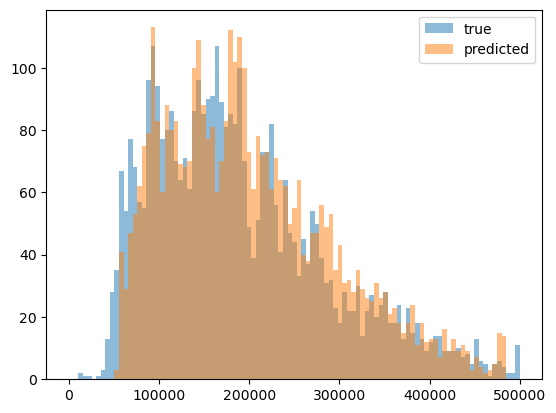

In [45]:
bins = np.linspace(0, 500_000, 100)
plt.hist(scaler_target.inverse_transform(y_test), bins, alpha=0.5, label='true')
plt.hist(scaler_target.inverse_transform(np.reshape(rfr.predict(x_test), (-1, 1))), bins , alpha=0.5, label='predicted')
plt.legend(loc='upper right')
plt.show()

Distribution isn't ideal but has similar shape.